In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

Setup pytrend library and keyword define

In [44]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "Cricket"

Data Request

In [45]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo='', gprop = '')

Country-Wise Interest

In [46]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending =False).head(20)

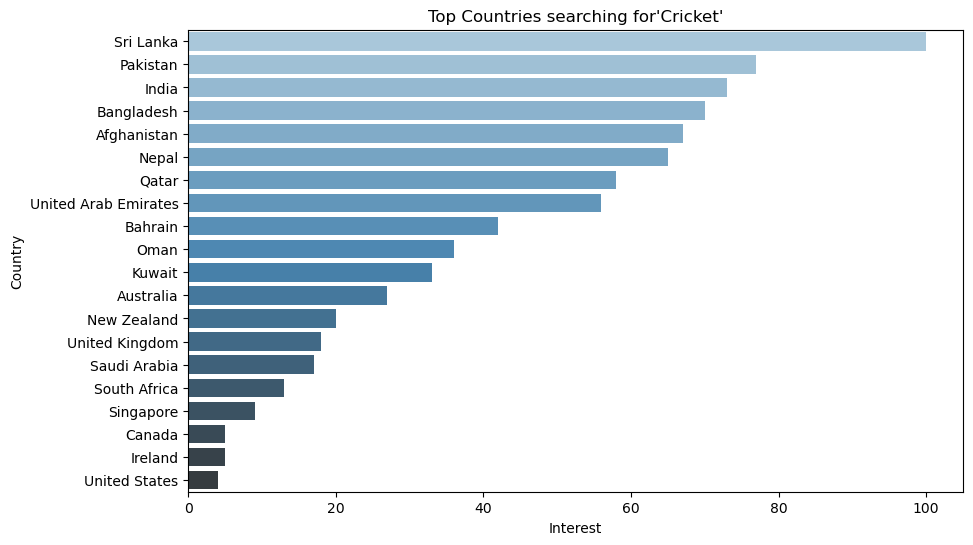

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(x =region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.title(f"Top Countries searching for'{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

World Map

In [48]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations= 'geoName',
                    locationmode= 'country names',
                    color = keyword,
                    title = f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Reds')

fig.show()


Time Wise Interest


In [49]:
time_df = pytrends.interest_over_time()

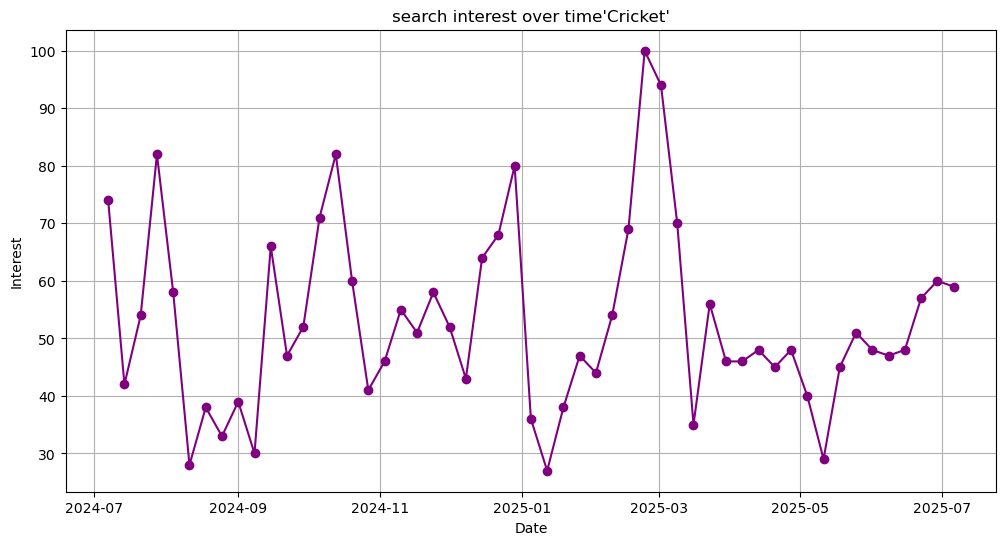

In [50]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword],marker = 'o', color ='purple')
plt.title(f"search interest over time'{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

In [51]:
kw_list = ["Cricket", "Football", "Tennis"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')



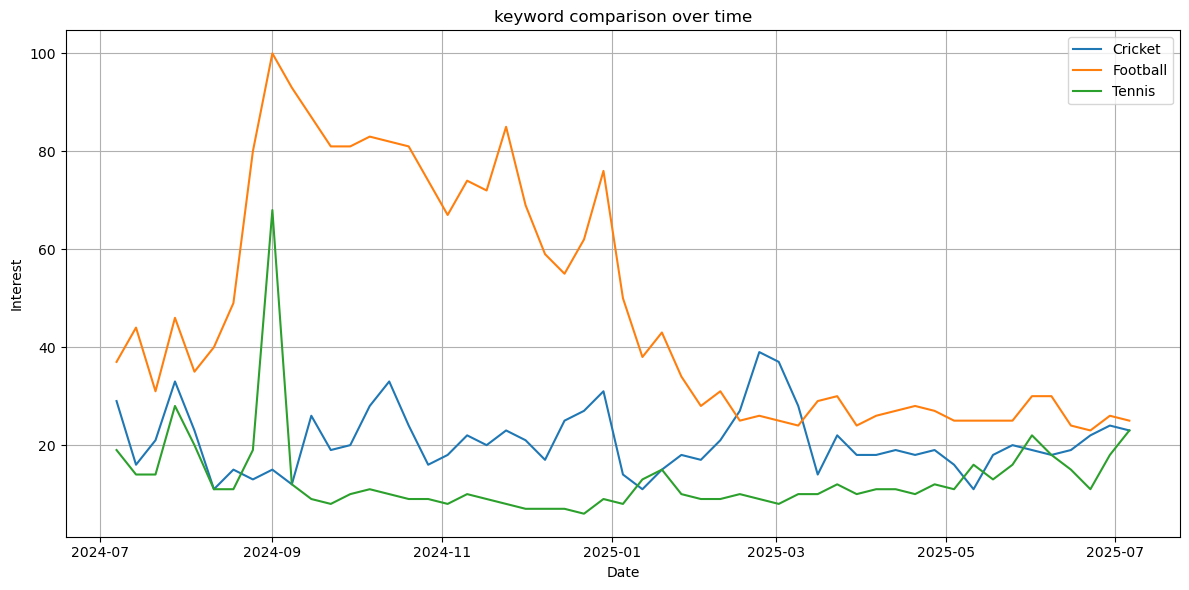

In [52]:
compare_df  = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label= kw)

plt.title("keyword comparison over time")    
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()